In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('loan defaulter.csv.csv')
df.head()

,customer.id,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,inq.last.6mths,delinq.2yrs,paid.back.loan
0,LA001,Yes,debt_consolidation,11.89%,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,Less than 5,No,Yes
1,LA002,Yes,credit_card,10.71%,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,Less than 5,No,Yes
2,LA003,Yes,debt_consolidation,13.57%,366.86,10.373491,11.63,682,4710.000000,3511,25.6,0,Less than 5,No,Yes
3,LA004,Yes,debt_consolidation,10.08%,162.34,11.350407,8.10,712,2699.958333,33667,73.2,0,Less than 5,No,Yes
4,LA005,Yes,credit_card,14.26%,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,Less than 5,Yes,Yes


In [3]:
df.isnull().sum()

customer.id          0
credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
pub.rec              0
inq.last.6mths       0
delinq.2yrs          0
paid.back.loan       0
dtype: int64

In [4]:
df.drop('customer.id',axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null object
purpose              9578 non-null object
int.rate             9578 non-null object
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
pub.rec              9578 non-null int64
inq.last.6mths       9578 non-null object
delinq.2yrs          9578 non-null object
paid.back.loan       9578 non-null object
dtypes: float64(5), int64(3), object(6)
memory usage: 1.0+ MB


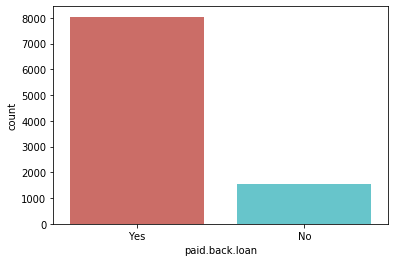

In [6]:
#df.paid.back.loan.value_counts()
sns.countplot(x='paid.back.loan',data=df,palette='hls')
plt.show()

In [7]:

loan_cat = df.select_dtypes(object)
loan_num = df.select_dtypes(["float64","int64"])

In [8]:
from sklearn.preprocessing import LabelEncoder


In [9]:
for col in loan_cat:
    le = LabelEncoder()
    # fit transform generates the classes as well as transforms the data
    loan_cat[col] = le.fit_transform(loan_cat[col])
    print(col, " : ", le.classes_)
loan_cat.head()

credit.policy  :  ['No' 'Yes']
purpose  :  ['all_other' 'credit_card' 'debt_consolidation' 'educational'
 'home_improvement' 'major_purchase' 'small_business']
int.rate  :  ['10.01%' '10.08%' '10.14%' '10.20%' '10.25%' '10.28%' '10.33%' '10.39%'
 '10.46%' '10.51%' '10.59%' '10.62%' '10.64%' '10.71%' '10.78%' '10.83%'
 '10.91%' '10.95%' '10.96%' '10.99%' '11.03%' '11.09%' '11.14%' '11.22%'
 '11.26%' '11.28%' '11.34%' '11.36%' '11.41%' '11.46%' '11.48%' '11.54%'
 '11.58%' '11.59%' '11.66%' '11.72%' '11.78%' '11.83%' '11.86%' '11.89%'
 '11.91%' '11.97%' '12.04%' '12.09%' '12.17%' '12.18%' '12.21%' '12.22%'
 '12.29%' '12.36%' '12.41%' '12.49%' '12.53%' '12.54%' '12.61%' '12.67%'
 '12.72%' '12.73%' '12.80%' '12.84%' '12.86%' '12.87%' '12.92%' '12.99%'
 '13.04%' '13.11%' '13.12%' '13.16%' '13.17%' '13.22%' '13.24%' '13.30%'
 '13.36%' '13.43%' '13.47%' '13.48%' '13.49%' '13.55%' '13.57%' '13.62%'
 '13.67%' '13.75%' '13.79%' '13.80%' '13.85%' '13.87%' '13.92%' '13.93%'
 '13.99%' '14.07%' '14.1

,credit.policy,purpose,int.rate,inq.last.6mths,delinq.2yrs,paid.back.loan
0,1,2,39,3,0,1
1,1,1,13,3,0,1
2,1,2,78,3,0,1
3,1,2,1,3,0,1
4,1,1,95,3,1,1


In [10]:
loan_new = pd.concat([loan_num, loan_cat], axis=1)
loan_new.head()

,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,credit.policy,purpose,int.rate,inq.last.6mths,delinq.2yrs,paid.back.loan
0,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,1,2,39,3,0,1
1,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,1,1,13,3,0,1
2,366.86,10.373491,11.63,682,4710.000000,3511,25.6,0,1,2,78,3,0,1
3,162.34,11.350407,8.10,712,2699.958333,33667,73.2,0,1,2,1,3,0,1
4,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,1,95,3,1,1


In [16]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()

In [17]:
from sklearn.preprocessing import StandardScaler
loan_ss = loan_new.copy()
for col in loan_ss:
    ss = StandardScaler()
    loan_ss[col] = mx.fit_transform(loan_ss[[col]])
loan_ss.head()

,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,credit.policy,purpose,int.rate,inq.last.6mths,delinq.2yrs,paid.back.loan
0,0.879888,0.544762,0.650200,0.581395,0.312754,0.023898,0.437815,0.0,1.0,0.333333,0.157258,1.0,0.0,1.0
1,0.229916,0.506334,0.476969,0.441860,0.147818,0.027848,0.644538,0.0,1.0,0.166667,0.052419,1.0,0.0,1.0
2,0.379883,0.404820,0.388184,0.325581,0.259495,0.002908,0.215126,0.0,1.0,0.333333,0.314516,1.0,0.0,1.0
3,0.158653,0.544762,0.270360,0.465116,0.144379,0.027885,0.615126,0.0,1.0,0.333333,0.004032,1.0,0.0,1.0
4,0.094378,0.537503,0.499666,0.255814,0.222613,0.003926,0.331933,0.0,1.0,0.166667,0.383065,1.0,1.0,1.0


In [18]:
loan_ss.corr()

,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,credit.policy,purpose,int.rate,inq.last.6mths,delinq.2yrs,paid.back.loan
installment,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.032760,0.058770,0.154827,-0.122536,-0.005717,-0.000578,-0.049955
log.annual.inc,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.016506,0.034906,0.088958,0.005410,-0.027215,0.024569,0.033439
dti,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.006209,-0.090901,-0.053279,-0.120368,-0.018515,-0.016648,-0.037362
fico,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.147592,0.348319,0.057337,0.334561,0.114942,-0.227476,0.149666
days.with.cr.line,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,0.071826,0.099026,0.047526,0.086392,0.009274,0.085050,0.029237
revol.bal,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,-0.031010,-0.187518,0.042364,-0.031110,-0.024545,-0.025654,-0.053699
revol.util,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,0.066717,-0.104095,-0.062947,-0.227108,0.022089,-0.031088,-0.082088
pub.rec,-0.032760,0.016506,0.006209,-0.147592,0.071826,-0.031010,0.066717,1.000000,-0.054243,0.004793,-0.065040,-0.073346,0.004244,-0.048634
credit.policy,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.054243,1.000000,0.017569,0.021417,0.505044,-0.055405,0.158119
purpose,0.154827,0.088958,-0.053279,0.057337,0.047526,0.042364,-0.062947,0.004793,0.017569,1.000000,0.013933,-0.015976,-0.007960,-0.047907


In [19]:
x=loan_ss.drop(['paid.back.loan'],axis=1)
x.head()

,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,credit.policy,purpose,int.rate,inq.last.6mths,delinq.2yrs
0,0.879888,0.544762,0.650200,0.581395,0.312754,0.023898,0.437815,0.0,1.0,0.333333,0.157258,1.0,0.0
1,0.229916,0.506334,0.476969,0.441860,0.147818,0.027848,0.644538,0.0,1.0,0.166667,0.052419,1.0,0.0
2,0.379883,0.404820,0.388184,0.325581,0.259495,0.002908,0.215126,0.0,1.0,0.333333,0.314516,1.0,0.0
3,0.158653,0.544762,0.270360,0.465116,0.144379,0.027885,0.615126,0.0,1.0,0.333333,0.004032,1.0,0.0
4,0.094378,0.537503,0.499666,0.255814,0.222613,0.003926,0.331933,0.0,1.0,0.166667,0.383065,1.0,1.0


In [20]:
y=loan_ss['paid.back.loan']
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: paid.back.loan, dtype: float64

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [25]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_perd=logreg.predict(x_test)

In [30]:
met=metrics.confusion_matrix(y_test,y_perd)
met

array([[   0,  301],
       [   0, 1615]], dtype=int64)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(tp, fn)
print(fp, tn)

NameError: name 'y_pred' is not defined

In [32]:
print(metrics.accuracy_score(y_test,y_perd))
print(metrics.recall_score(y_test,y_perd))
print(metrics.precision_score(y_test,y_perd))

0.842901878914405
1.0
0.842901878914405


In [33]:
auc=metrics.roc_auc_score(y_test,y_perd)
auc

0.5

In [34]:
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [35]:
dt = DecisionTreeClassifier()

In [36]:
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.7244258872651357

In [37]:
dt4 = DecisionTreeClassifier(criterion="entropy")
dt4.fit(x_train,y_train)
dt4.score(x_test,y_test)

0.7630480167014614

In [38]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=60)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8392484342379958


In [39]:
from sklearn.feature_selection import chi2
# score_func of Annova
from sklearn.feature_selection import f_regression
# class that accepts the score_func parameters
from sklearn.feature_selection import SelectKBest

In [40]:
annova = SelectKBest(score_func=f_regression,k=12)


In [41]:
x_train_annova = annova.fit_transform(x_train,y_train)
x_test_annova = annova.transform(x_test)
#lin_annova = LinearRegression()
logreg.fit(x_train_annova, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
logreg.score(x_test_annova, y_test)

0.842901878914405

In [43]:
chi = SelectKBest(score_func=chi2,k=7)

# this will throw an error as it works on non-negative values
x_train_chi = chi.fit_transform(x_train,y_train)

x_test_chi = chi.transform(x_test)
#lin_chi = LinearRegression()
logreg.fit(x_train_chi, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
logreg.score(x_test_chi, y_test)

0.842901878914405

In [53]:
auc=metrics.roc_auc_score(x_test_chi, y_test)
auc

ValueError: continuous-multioutput format is not supported

In [45]:
from sklearn.decomposition import PCA 

pca = PCA(n_components = 2) 

x_train = pca.fit_transform(x_train) 
x_test = pca.transform(x_test) 

explained_variance = pca.explained_variance_ratio_

In [46]:
explained_variance

array([0.25919597, 0.16274611])

In [47]:
from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression(random_state = 0) 
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
y_pred = classifier.predict(x_test)


In [49]:
from sklearn.metrics import accuracy_score, f1_score
accuracy_score(y_test, y_pred)

0.842901878914405